# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ROCAUC
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

%matplotlib inline

/home/jeffc/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

### Now take a look at the shapes of the X and y matricies 

In [3]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [4]:
digit = X[36000, :]

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

/home/jeffc/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


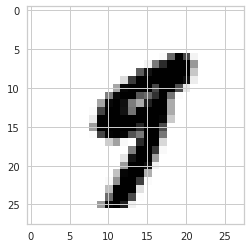

In [5]:
plt.imshow(digit.reshape(28, 28), cmap=plt.cm.binary, interpolation="nearest");

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [6]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [7]:
X_train = X[:60000, :]
X_test = X[60000:, :]
y_train = y[:60000]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [8]:
y_train_5 = y_train == '5'
y_test_5 = y_test == '5'

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [9]:
logr = LogisticRegression(n_jobs=-1, verbose=1)
logr.fit(X_train, y_train_5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.6min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

### Does the classifier predict correctly the 36000th digit we picked before?

In [10]:
logr.predict(digit.reshape(1, -1))

array([False])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [11]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [12]:
never_5_clf.fit(X_train, y_train_5)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [13]:
print('LOGISTIC REGRESSION TRAIN CONFUSION MATRIX:')
print(classification_report(y_train_5, logr.predict(X_train)))
print('\nLOGISTIC REGRESSION TEST CONFUSION MATRIX:')
print(classification_report(y_test_5, logr.predict(X_test)))
print('\nDUMB CLASSIFIER TRAIN CONFUSION MATRIX:')
print(classification_report(y_train_5, never_5_clf.predict(X_train)))
print('\nDUMB CLASSIFIER TEST CONFUSION MATRIX:')
print(classification_report(y_test_5, never_5_clf.predict(X_test)))

# cutoff: 0.5

LOGISTIC REGRESSION TRAIN CONFUSION MATRIX:
              precision    recall  f1-score   support

       False       0.98      0.99      0.99     54579
        True       0.91      0.83      0.87      5421

    accuracy                           0.98     60000
   macro avg       0.95      0.91      0.93     60000
weighted avg       0.98      0.98      0.98     60000


LOGISTIC REGRESSION TEST CONFUSION MATRIX:
              precision    recall  f1-score   support

       False       0.98      0.99      0.99      9108
        True       0.91      0.84      0.87       892

    accuracy                           0.98     10000
   macro avg       0.95      0.91      0.93     10000
weighted avg       0.98      0.98      0.98     10000


DUMB CLASSIFIER TRAIN CONFUSION MATRIX:
              precision    recall  f1-score   support

       False       0.91      1.00      0.95     54579
        True       0.00      0.00      0.00      5421

    accuracy                           0.91     60000

/home/jeffc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

Without knowing what each model is, we can only tell that both models perform pretty well, with the first one being  slightly better.

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

LOGISTIC REGRESSION ROC CURVES:


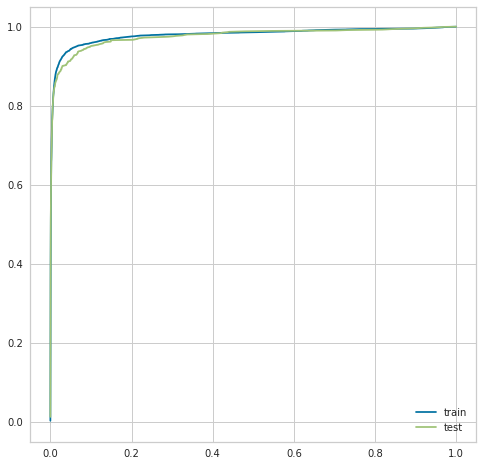

In [15]:
print('LOGISTIC REGRESSION ROC CURVES:')
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_5, logr.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_5, logr.predict_proba(X_test)[:, 1])

fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(fpr_train, tpr_train, ax=ax)
sns.lineplot(fpr_test, tpr_test, ax=ax)
ax.legend(['train', 'test']);

### Now find the roc_auc_score for each. 

In [19]:
print('logr_train_rocauc: {}'.format(roc_auc_score(y_train_5, logr.predict_proba(X_train)[:, 1])))
print('logr_test_rocauc: {}'.format(roc_auc_score(y_test_5, logr.predict_proba(X_test)[:, 1])))

logr_train_rocauc: 0.9792999057408999
logr_test_rocauc: 0.9760923231141597


### Using the yellowbrick library  plot the roc_auc_score curve for the logistic model . 

/home/jeffc/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/jeffc/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


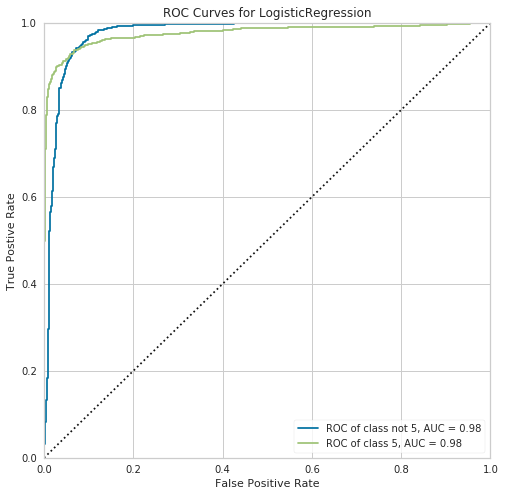

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
logr_roc = ROCAUC(logr, classes=["not 5", "5"], micro=False, macro=False)
logr_roc.fit(X_train, y_train_5)
logr_roc.score(X_test, y_test_5)
logr_roc.show();

### What does this metric tell you? Which classifier works better with this metric in mind?

It is a metric of how good your model is overall. The logistic classifier is better, since the area under its ROC curve is higher. The other model is only as good as a random classifier.